In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
# Set the number of cities and generate random city coordinates
num_cities = 12
cities = np.random.rand(num_cities, 2)

In [3]:
cities

array([[0.26182686, 0.69422658],
       [0.0882108 , 0.82516964],
       [0.50394263, 0.92292919],
       [0.33147056, 0.47933854],
       [0.36386171, 0.49771172],
       [0.098168  , 0.82865571],
       [0.7259424 , 0.32003194],
       [0.34502769, 0.5784116 ],
       [0.56020156, 0.70755172],
       [0.62412461, 0.22552196],
       [0.7643113 , 0.28001808],
       [0.25769701, 0.05059361]])

In [4]:
#pd.DataFrame(cities, columns=["Latitude","Longitude"]).to_csv("cities.csv", index=False)

In [5]:
cities = pd.read_csv("cities.csv")
cities = np.array(cities)
cities

array([[0.68564117, 0.94149231],
       [0.08406784, 0.32498417],
       [0.87065468, 0.98497868],
       [0.41816963, 0.89277934],
       [0.68383232, 0.86653025],
       [0.58226548, 0.65722797],
       [0.91506608, 0.1201162 ],
       [0.34835276, 0.61520676],
       [0.06278476, 0.62863416],
       [0.43118833, 0.91173837],
       [0.48746043, 0.72555095],
       [0.44471039, 0.34786596]])

Text(0, 0.5, 'Longitude')

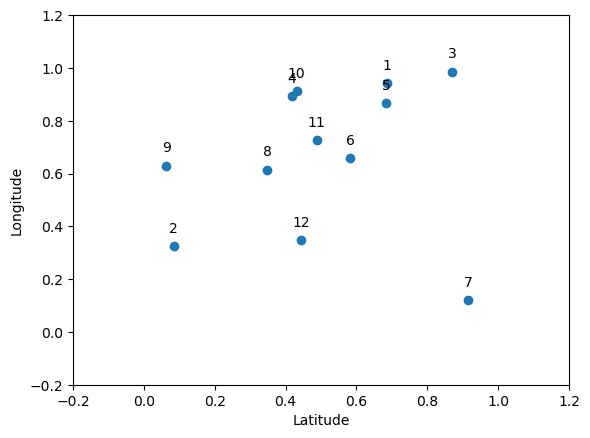

In [6]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [7]:
# Calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return distance_matrix

In [8]:
distance_matrix = calculate_distance_matrix(cities)
distance_matrix

array([[0.        , 0.86137841, 0.19005542, 0.27187125, 0.07498388,
        0.30247769, 0.85281563, 0.46928214, 0.6970153 , 0.25618654,
        0.29309772, 0.64065582],
       [0.86137841, 0.        , 1.02679677, 0.65879843, 0.80807771,
        0.5988212 , 0.85587905, 0.39252474, 0.30439496, 0.68174272,
        0.56848864, 0.36136772],
       [0.19005542, 1.02679677, 0.        , 0.46178289, 0.2212072 ,
        0.43656484, 0.866002  , 0.63994575, 0.88296955, 0.44552757,
        0.46275326, 0.76638185],
       [0.27187125, 0.65879843, 0.46178289, 0.        , 0.26695632,
        0.28707473, 0.91864814, 0.28621833, 0.44279915, 0.02299851,
        0.18101533, 0.54555935],
       [0.07498388, 0.80807771, 0.2212072 , 0.26695632, 0.        ,
        0.23264408, 0.78141089, 0.4191778 , 0.66505234, 0.25665689,
        0.24173762, 0.57113215],
       [0.30247769, 0.5988212 , 0.43656484, 0.28707473, 0.23264408,
        0.        , 0.6318586 , 0.23765719, 0.52026707, 0.29597272,
        0.116859  ,

Text(0, 0.5, 'Longitude')

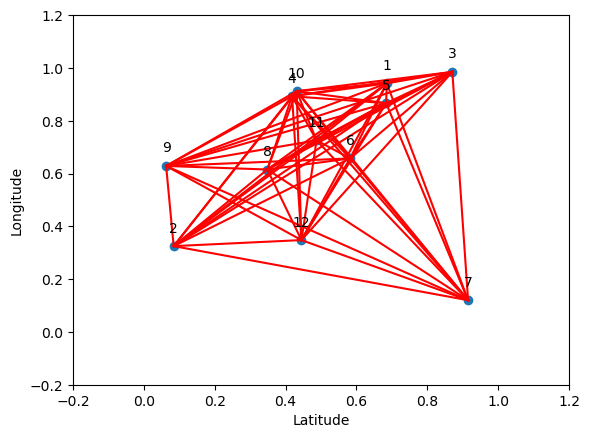

In [9]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        plt.plot([cities[i,0], cities[j,0]], [cities[i,1], cities[j,1]], color='red')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [10]:
origin_city = 6
destination_city = 9

In [11]:
def plot_origin_desitination(cities, origin_city, destination_city):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

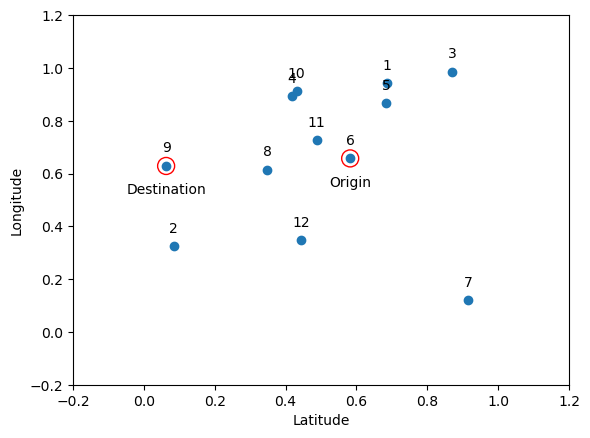

In [12]:
plot_origin_desitination(cities, origin_city, destination_city)

In [13]:
# Define population size and number of generations
population_size = 20
num_generations = 10000

In [14]:
# Initialize the population
def initialize_population(population_size, num_cities, origin_city, destination_city):
    if origin_city != destination_city:
        population = np.zeros((population_size, num_cities), dtype=int)
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        rest_cities.remove(destination_city)
        for i in range(population_size):
            population[i][0] = origin_city
            population[i][-1] = destination_city
            population[i][1:-1] = np.random.permutation(rest_cities)
    else:
        population = np.zeros((population_size, num_cities+1), dtype=int)
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        for i in range(population_size):
            population[i][0] = origin_city
            population[i][-1] = destination_city
            population[i][1:-1] = np.random.permutation(rest_cities)
    return population

In [15]:
population = initialize_population(population_size, num_cities, origin_city, destination_city)
population

array([[ 6,  4,  2,  8,  7,  5,  3, 11,  1, 12, 10,  9],
       [ 6,  1, 11, 12,  2,  3,  8, 10,  5,  7,  4,  9],
       [ 6,  7, 11,  3,  8,  1,  5, 12, 10,  2,  4,  9],
       [ 6,  2, 11,  1, 10,  3,  8, 12,  4,  7,  5,  9],
       [ 6,  2,  8,  7,  1,  5, 10, 12, 11,  3,  4,  9],
       [ 6,  4,  2,  7,  3,  8,  1,  5, 10, 12, 11,  9],
       [ 6,  4,  7,  5,  8,  3, 12,  2, 10,  1, 11,  9],
       [ 6,  7,  1,  3,  5, 11,  4, 10,  2, 12,  8,  9],
       [ 6,  4,  2, 10, 11,  1, 12,  8,  5,  7,  3,  9],
       [ 6,  4,  7,  1,  5,  3, 12, 11,  2,  8, 10,  9],
       [ 6,  1,  3, 11, 12,  5,  8,  4,  7, 10,  2,  9],
       [ 6,  5,  4,  2,  8,  7,  3, 11, 12,  1, 10,  9],
       [ 6,  1, 10,  4, 11, 12,  8,  3,  2,  7,  5,  9],
       [ 6,  4,  1,  2,  3, 11, 10,  5,  7,  8, 12,  9],
       [ 6,  7,  2, 12,  8, 11,  4,  3, 10,  1,  5,  9],
       [ 6, 11, 12, 10,  5,  3,  2,  7,  1,  8,  4,  9],
       [ 6,  3, 10,  2,  8,  1, 11,  4,  5,  7, 12,  9],
       [ 6, 12,  8,  4,  7,  5,

In [16]:
path = population[0]
[distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)]

[0.2870747269333429,
 0.6587984292490272,
 0.3925247427529493,
 0.7525148842241055,
 0.7814108887020381,
 0.22120720290610527,
 0.4627532581087128,
 0.2930977226517836,
 0.6406558173344814,
 0.5640345206583887,
 0.46461725070821935]

In [17]:
# Calculate the fitness (total path length) for each individual
def calculate_fitness(population, distance_matrix):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        path = population[i]
        fitness[i] = np.sum([distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)])
    return fitness

In [18]:
fitness = calculate_fitness(population, distance_matrix)
fitness

array([5.51868944, 5.71118171, 5.93854435, 5.99691396, 5.23978375,
       5.4883483 , 5.84062805, 3.95485808, 5.98961077, 5.23472306,
       5.44449206, 5.37375005, 5.39603542, 5.65316136, 4.39538758,
       5.47264541, 4.9447394 , 5.43358544, 5.15062213, 6.71962176])

In [19]:
# Crossover operation
def crossover(parent1, parent2):
    child = np.zeros(len(parent1), dtype=int)
    child[0] = parent1[0]
    child[-1] = parent1[-1]
    start = np.random.randint(1,len(parent1)-2)
    end = np.random.randint(start+1, len(parent1)-1)
    child[start:end] = parent1[start:end]
    remaining = [x for x in parent2 if x not in child]
    child[~child.astype(bool)] = remaining
    return child

In [20]:
child = crossover(population[0], population[1])
child

array([ 6, 12,  2,  8, 10,  5,  3, 11,  1,  7,  4,  9])

In [21]:
# Mutation operation
def mutate(parent):
    i, j = random.sample(range(1, len(parent)-1), 2)
    child[i], child[j] = child[j], child[i]
    return child

In [22]:
child = mutate(population[0])
child

array([ 6, 12,  2,  3, 10,  5,  8, 11,  1,  7,  4,  9])

In [23]:
# Select parents from the population and generate children using crossover
def children_by_crossover(population):
    num_children = len(population) // 2
    children = np.zeros((num_children, population.shape[1]), dtype=int)
    for i in range(num_children):
        m, n = random.sample(range(0, len(population)), 2)
        parent1 = population[m]
        parent2 = population[n]
        children[i] = crossover(parent1, parent2)
    return children

In [24]:
children = children_by_crossover(population)
children

array([[ 6,  4,  7,  1,  5,  3, 12, 10, 11,  2,  8,  9],
       [ 6,  2,  5,  8, 10,  7,  3, 11, 12,  1,  4,  9],
       [ 6, 11,  3,  2,  5,  8, 10, 12,  4,  7,  1,  9],
       [ 6,  1, 11,  2, 10,  3,  8, 12,  4,  5,  7,  9],
       [ 6, 11,  5,  8, 10,  3,  2,  7,  1, 12,  4,  9],
       [ 6,  4,  2,  8,  3, 11, 10,  5,  7,  1, 12,  9],
       [ 6,  4, 11, 12,  2,  3,  8, 10,  5,  7,  1,  9],
       [ 6,  5,  3,  2,  7,  1, 10, 12, 11,  8,  4,  9],
       [ 6,  1, 11, 12,  5,  8,  4,  7, 10,  3,  2,  9],
       [ 6,  3,  1,  2,  5,  8, 10, 12,  4,  7, 11,  9]])

In [25]:
# Main loop
best_distances = []
for generation in range(num_generations):
    children1 = children_by_crossover(population)
    num_children2 = len(population)-len(children1)
    children2 = np.zeros((num_children2, population.shape[1]), dtype=int)
    for i in range(num_children2):
        parent = population[np.random.choice(len(population))]
        child = mutate(parent)
        children2[i] = child
    population = np.concatenate((population, children1, children2), axis=0)
    fitness = calculate_fitness(population, distance_matrix)
    sort_indices = np.argsort(fitness)
    population = population[sort_indices][:population_size]
    fitness = fitness[sort_indices][:population_size]
    best_distances.append(fitness[0])

Text(0, 0.5, 'Distance')

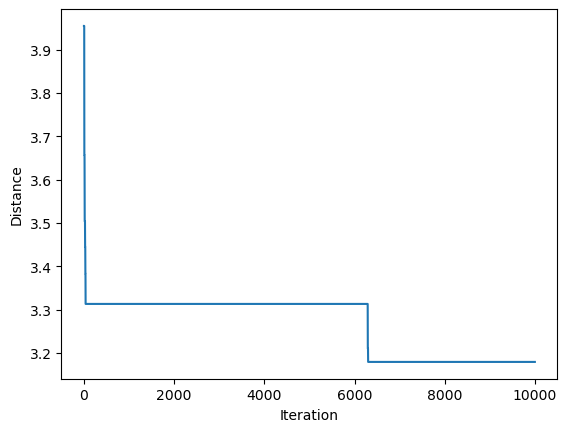

In [26]:
plt.plot(range(num_generations), best_distances)
plt.xlabel("Iteration")
plt.ylabel("Distance")

In [27]:
# Find the best path
best_path = population[np.argmin(fitness)]
best_distance = min(fitness)

In [28]:
# Print the results
print("Best path:", best_path)
print("Shortest path length:", best_distance)

Best path: [ 6 11  8  4 10  5  1  3  7 12  2  9]
Shortest path length: 3.179688491154706


In [29]:
# Plot the best path
def plot_best_path(cities, origin_city, destination_city, best_path):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    for i in range(len(best_path)-1):
        plt.plot([cities[best_path[i]-1,0], cities[best_path[i+1]-1,0]], [cities[best_path[i]-1,1], cities[best_path[i+1]-1,1]], color='r')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

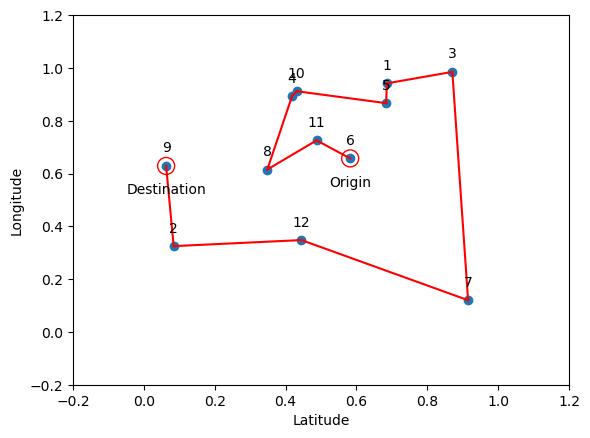

In [30]:
plot_best_path(cities, origin_city, destination_city, best_path)